In [10]:
from dataclasses import dataclass
import numpy as np
from numpy import ndarray, float64
import matplotlib.pyplot as plt
import scipy


In [11]:
TABLE1 = np.loadtxt("Data/TTB_Table_1_digitized-2.csv", delimiter=",")
TABLE6 = np.loadtxt(
    "./Data/TTB_Table_6_digitized.csv",
    delimiter=",",
    skiprows=10,
    usecols=[0, 1, 2, 3, 4],
)


In [12]:
@dataclass
class EthanolMeasurement:
    concentration: float64  # %ethanol by mass
    density: ndarray  # g/cm^3
    dtemp: ndarray  # Celsius
    pmass: ndarray  # grams
    ptemp: ndarray  # Celsius


# Data for measurments of various concentrations of ethanol
ethanol00 = EthanolMeasurement(
    concentration=float64(0.0),
    density=np.array([0.9925, 0.9925, 0.9925]),
    dtemp=np.array([23.4, 23.4, 23.4]),
    pmass=np.array([60.505, 60.514, 60.507, 60.508]),
    ptemp=np.array([24.0, 24.0, 24.0]),
)

ethanol10 = EthanolMeasurement(
    concentration=float64(5.003 / 50.2),
    density=np.array([0.9757, 0.9799, 0.9801]),
    dtemp=np.array([25.7, 25.5, 25.5]),
    pmass=np.array([60.346, 60.347, 60.345]),
    ptemp=np.array([25.2, 25.2, 25.4]),
)

ethanol20 = EthanolMeasurement(
    concentration=float64(10.0 / 50.055),
    density=np.array([0.9627, 0.9652, 0.9657]),
    dtemp=np.array([26.9, 26.8, 26.9]),
    pmass=np.array([59.99, 59.987, 59.985]),
    ptemp=np.array([25.8, 25.6, 25.8]),
)

ethanol30 = EthanolMeasurement(
    concentration=float64(15.0 / 50.285),
    density=np.array([0.9462, 0.9480, 0.9481]),
    dtemp=np.array([27.3, 27.4, 27.4]),
    pmass=np.array([59.609, 59.607, 59.604]),
    ptemp=np.array([25.4, 25.4, 25.2]),
)

ethanol40 = EthanolMeasurement(
    concentration=float64(20.056 / 50.155),
    density=np.array([0.9269, 0.9303, 0.9315]),
    dtemp=np.array([24.8, 24.9, 24.9]),
    pmass=np.array([59.036, 59.031, 59.029]),
    ptemp=np.array([25.0, 25.0, 25.0]),
)

ethanol50 = EthanolMeasurement(
    concentration=float64(25.026 / 50.006),
    density=np.array([0.9085, 0.9078, 0.9081]),
    dtemp=np.array([25.4, 26.0, 26.1]),
    pmass=np.array([58.520, 58.520, 58.519]),
    ptemp=np.array([25.4, 25.6, 25.4]),
)

ethanol60 = EthanolMeasurement(
    concentration=float64(30.028 / 50.175),
    density=np.array([0.8874, 0.8867, 0.8865]),
    dtemp=np.array([25.2, 25.4, 25.5]),
    pmass=np.array([57.958, 57.948, 57.944]),
    ptemp=np.array([24.0, 24.2, 24.3]),
)

ethanol80 = EthanolMeasurement(
    concentration=float64(40.148 / 49.953),
    density=np.array([0.8557, 0.8457, 0.8445]),
    dtemp=np.array([24.0, 24.3, 24.3]),
    pmass=np.array([58.612, 58.613, 58.606]),
    ptemp=np.array([21.5, 22.0, 22.2]),
)

ethanol90 = EthanolMeasurement(
    concentration=float64(45.076 / 50.101),
    density=np.array([0.8156, 0.8153, 0.8152]),
    dtemp=np.array([23.9, 23.9, 24.0]),
    pmass=np.array([57.737, 57.737, 57.739]),
    ptemp=np.array([23.4, 23.4, 23.4]),
)

ethanol_measurments = [
    ethanol00,
    ethanol10,
    ethanol20,
    ethanol30,
    ethanol40,
    ethanol50,
    ethanol60,
    ethanol80,
    ethanol90,
]


@dataclass
class Pycnometer:
    empty_mass: float64  # in grams
    volume: float64  # in cm^3
    std_volume: float64


def new_pycnometer(
    empty_mass: float64, full_mass: ndarray, water_density: float64
) -> Pycnometer:
    water_mass = full_mass - empty_mass
    water_volume = water_mass / water_density
    volume = water_volume.mean()
    std_volume = water_volume.std()
    return Pycnometer(empty_mass, volume, std_volume)


pycnometer1 = new_pycnometer(
    34.817, np.array([60.505, 60.514, 60.507, 60.508]), 0.997296
)
pycnometer2 = new_pycnometer(35.844, np.array([62.600, 62.586]), 0.997747)


@dataclass
class PycnometerMeasurment:
    full_mass: float64  # in grams
    avg_temp: float64  # in C
    density: float64  # in g/cc
    std_density: float64


def new_pycnometer_measurement(pycnometer: Pycnometer, mass: ndarray, temp: ndarray):
    fluid_mass = mass - pycnometer.empty_mass
    avg_mass = fluid_mass.mean()
    std_mass = fluid_mass.std()
    avg_temp = temp.mean()

    avg_density = avg_mass / pycnometer.volume
    std_density = avg_density * np.sqrt(
        (std_mass / avg_mass) ** 2 + (pycnometer.std_volume / pycnometer.volume) ** 2
    )
    return PycnometerMeasurment(avg_mass, avg_temp, avg_density, std_density)


which_pycno = [
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer1,
    pycnometer2,
    pycnometer2,
]
pycnometer_measurments: list[PycnometerMeasurment] = []
for i, eth in enumerate(ethanol_measurments):
    measurment = new_pycnometer_measurement(which_pycno[i], eth.pmass, eth.ptemp)
    pycnometer_measurments.append(measurment)




25.733333333333334
25.733333333333334


In [14]:
def find_nearest(data, value):
    idx = (np.abs(data - value)).argmin()
    return idx


def find_nearest_value(data, value):
    idx = (np.abs(data - value)).argmin()
    return data[idx]


def true_proof(density, temperature):
    """
    Accepts a density in g/cm^3 and a temperature in C and returns the true proof
    """
    alpha = 25e-6
    t1 = (temperature * 1.8) + 32
    p2 = density * (1 + alpha * (t1 - 60))
    spg2 = p2 / 0.99904

    interp_proof = scipy.interpolate.interp1d(TABLE6[:, 4], TABLE6[:, 0])
    c2 = interp_proof(spg2)

    cr = np.floor(c2)
    tr = np.floor(t1)

    proof_range = np.arange(0, 207)
    temp_range = np.arange(1, 101)
    temp_idx = np.where(temp_range == tr)[0][0] + 1
    proof_idx = np.where(proof_range == cr)[0][0]

    f = TABLE1[proof_idx, temp_idx]
    f_proof_plus_one = TABLE1[proof_idx + 1, temp_idx]
    f_temp_plus_one = TABLE1[proof_idx, temp_idx + 1]

    df_dC = (f_proof_plus_one - f) / (cr + 1 - cr)
    df_dT = (f_temp_plus_one - f) / (tr + 1 - tr)

    true_proof = f + (c2 - cr) * df_dC + (t1 - tr) * df_dT
    return true_proof


def mass_fraction(true_proof):
    p_water_60 = 0.99904
    p_ethanol_60 = 0.79313
    interp_percent_water = scipy.interpolate.interp1d(TABLE6[:, 0], TABLE6[:, 2])
    vol_percent_water = interp_percent_water(true_proof)
    vol_percent_ethanol = true_proof / 2
    mass_frac_ethanol = (vol_percent_ethanol * p_ethanol_60) / (
        vol_percent_ethanol * p_ethanol_60 + vol_percent_water * p_water_60
    )
    return mass_frac_ethanol


def mole_fraction(true_proof):
    p_water_60 = 0.99904
    p_ethanol_60 = 0.79313
    molar_mass_ethanol = 46.06844
    molar_mass_water = 18.01528
    interp_percent_water = scipy.interpolate.interp1d(TABLE6[:, 0], TABLE6[:, 2])
    vol_percent_water = interp_percent_water(true_proof)
    vol_percent_ethanol = true_proof / 2
    mole_frac_ethanol = (vol_percent_ethanol * p_ethanol_60 / molar_mass_ethanol) / (
        (vol_percent_ethanol * p_ethanol_60 / molar_mass_ethanol)
        + (vol_percent_water * p_water_60 / molar_mass_water)
    )
    return mole_frac_ethanol


def temp_correct(density, dTemp, pTemp, true_proof):
    """
    Accepts a densitometer denstiy reading in g/cc a
    densometer and pycnometer temperature reading in C
    and a true_proof to return the temperature adjusted
    density measurement of the densitometer in g/cc
    """

    def FtoC(tempF):
        return (tempF - 32) * (5 / 9)

    alpha = 25e-6
    t1 = (dTemp * 1.8) + 32
    p2 = density * (1 + alpha * (t1 - 60))
    p_water = 0.99904
    spg2 = p2 / 0.99904

    interp_proof = scipy.interpolate.interp1d(TABLE6[:, 4], TABLE6[:, 0])
    c2 = interp_proof(spg2)

    cr = np.floor(c2)
    tr = np.floor(t1)

    proof_range = np.arange(0, 207)
    temp_range = np.arange(1, 101)
    temp_idx = np.where(temp_range == tr)[0][0] + 1
    proof_idx = np.where(proof_range == cr)[0][0]
    spg_idx = find_nearest(TABLE6[:, 1], true_proof / 2)

    tp_at_temp = TABLE1[proof_idx, temp_idx]
    tp_at_temp_plus_one = TABLE1[proof_idx, temp_idx + 1]
    spg = TABLE6[spg_idx, 4]
    spg_plus_one = TABLE6[spg_idx + 1, 4]
    ap_at_x = TABLE6[spg_idx, 0]
    ap_at_x_plus_one = TABLE6[spg_idx + 1, 0]

    dAP_dTP = abs((cr + 1 - cr) / (tp_at_temp_plus_one - tp_at_temp))
    dTP_dT = abs((tp_at_temp_plus_one - tp_at_temp) / (FtoC(tr + 1) - FtoC(tr)))
    dp_dAP = abs((p_water * (spg_plus_one - spg)) / (ap_at_x_plus_one - ap_at_x))

    dp_dT = abs(
        ((dTP_dT * dAP_dTP * dp_dAP) / (1 + alpha * (dTemp - 15.5556)))
        - ((alpha * density) / (1 + alpha * (dTemp - 15.5556)))
    )

    return density + dp_dT * (pTemp - dTemp)

pycnometer_measurments[2].


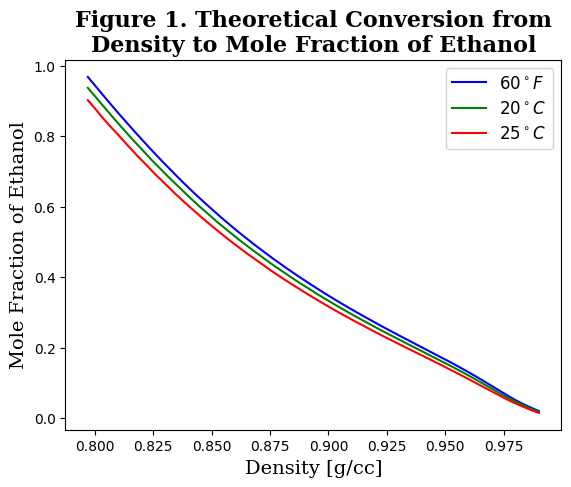

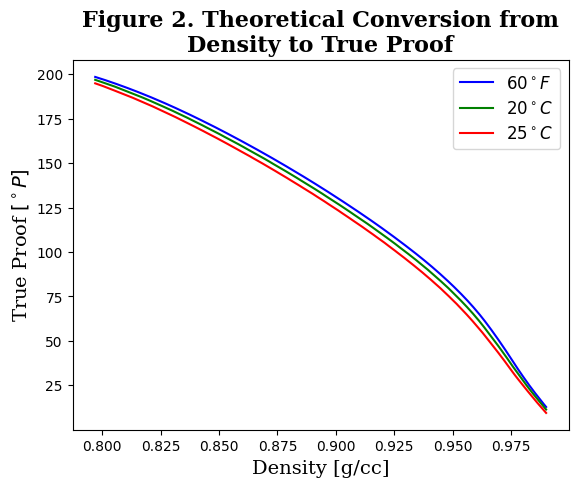

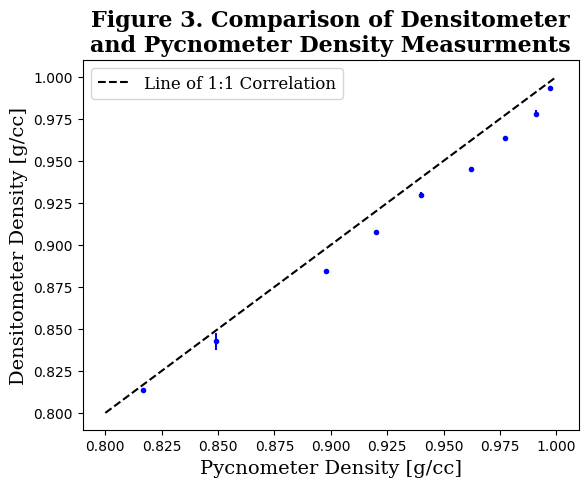

In [53]:
# Figure 1. mole fraction vs density for various temperatures
font = dict(family="serif", size=14)
legend = dict(family="serif", size=12)
title = dict(family="serif", size=16, weight="bold")

densities = np.linspace(0.7970, 0.9900, 1000)

true_proof_60F = []
true_proof_20C = []
true_proof_25C = []
for density in densities:
    true_proof_60F.append(true_proof(density, 15.5556))
    true_proof_20C.append(true_proof(density, 20))
    true_proof_25C.append(true_proof(density, 25))
true_proof_60F = np.array(true_proof_60F)
true_proof_20C = np.array(true_proof_20C)
true_proof_25C = np.array(true_proof_25C)

mole_frac_60F = []
mole_frac_20C = []
mole_frac_25C = []
for i in range(len(densities)):
    mole_frac_60F.append(mole_fraction(true_proof_60F[i]))
    mole_frac_20C.append(mole_fraction(true_proof_20C[i]))
    mole_frac_25C.append(mole_fraction(true_proof_25C[i]))
mole_frac_60F = np.array(mole_frac_60F)
mole_frac_20C = np.array(mole_frac_20C)
mole_frac_25C = np.array(mole_frac_25C)

plt.plot(densities, mole_frac_60F, "-", label="$60^\circ F$", color="blue")
plt.plot(densities, mole_frac_20C, "-", label="$20^\circ C$", color="green")
plt.plot(densities, mole_frac_25C, "-", label="$25^\circ C$", color="red")
plt.title(
    "Figure 1. Theoretical Conversion from\nDensity to Mole Fraction of Ethanol",
    **title
)
plt.xlabel("Density [g/cc]", **font)
plt.ylabel("Mole Fraction of Ethanol", **font)
plt.legend(prop=legend)
plt.show()

# Figure 2. true proof vs density for various temperatures
plt.plot(densities, true_proof_60F, "-", label="$60^\circ F$", color="blue")
plt.plot(densities, true_proof_20C, "-", label="$20^\circ C$", color="green")
plt.plot(densities, true_proof_25C, "-", label="$25^\circ C$", color="red")
plt.title("Figure 2. Theoretical Conversion from\nDensity to True Proof", **title)
plt.xlabel("Density [g/cc]", **font)
plt.ylabel("True Proof $[^\circ P]$", **font)
plt.legend(prop=legend)
plt.show()


# Figure 3. temperature corrected densinometer density vs pycnometer density
pycno_densities = []
pycno_errors = []
pycno_temps = []
for pycno in pycnometer_measurments:
    pycno_densities.append(pycno.density)
    pycno_errors.append(pycno.std_density)
    pycno_temps.append(pycno)
pycno_densities = np.array(pycno_densities)

dens_corrected_densities = []
dens_err = []
for i in range(len(pycnometer_measurments)):
    dens_err.append(ethanol_measurments[i].density.std())
    dens_corrected_densities.append(
        temp_correct(
            ethanol_measurments[i].density.mean(),
            ethanol_measurments[i].dtemp.mean(),
            pycnometer_measurments[i].avg_temp,
            true_proof(
                pycnometer_measurments[i].density, pycnometer_measurments[i].avg_temp
            ),
        )
    )
dens_corrected_densities = np.array(dens_corrected_densities)

x = np.linspace(0.8, 1.0, 100)
plt.errorbar(pycno_densities, dens_corrected_densities, fmt="b.", xerr=pycno_errors, yerr=dens_err)
plt.plot(x, x, "k--", label="Line of 1:1 Correlation")
plt.xlabel("Pycnometer Density [g/cc]", **font)
plt.ylabel("Densitometer Density [g/cc]", **font)
plt.title(
    "Figure 3. Comparison of Densitometer\nand Pycnometer Density Measurments", **title
)
plt.legend(prop=legend)
plt.show()


In [16]:
# Antoine coefficients in mmHG and degrees Celcius [A, B, C]
antoine_water = [7.96681, 1668.21, 228.00]
antoine_eth = [8.04494, 1554.30, 222.650]

# Van Laar coefficients for ethanol (1) and water (2)
A_12 = 1.6798
A_21 = 0.9227


def antoine(T, A, B, C):
    """
    Returns vapor pressure in mmHG from a temperature T in degrees Celcius
    and a substance's antoine coefficients
    """

    log_P = A - B / (T + C)
    P = 10**log_P
    return P


def van_laar(x_1):
    x_2 = 1 - x_1

    log_gamma_1 = A_12 * ((A_21 * x_2) / (A_12 * x_1 + A_21 * x_2)) ** 2
    log_gamma_2 = A_21 * ((A_12 * x_1) / (A_12 * x_1 + A_21 * x_2)) ** 2

    gamma_1 = np.exp(log_gamma_1)
    gamma_2 = np.exp(log_gamma_2)

    return gamma_1, gamma_2


def vle(T, x_1, P):
    P1_sat = antoine(T, *antoine_eth)
    P2_sat = antoine(T, *antoine_water)

    gamma_eth, gamma_water = van_laar(x_1)

    # From equation 2a
    y_a = gamma_eth * x_1 * P1_sat / P

    # From equation 2b
    y_b = 1 - (gamma_water * (1 - x_1) * P2_sat) / P

    return y_a - y_b


def calc_y(T, x_1, P):
    P1_sat = antoine(T, *antoine_eth)
    gamma_eth, gamma_water = van_laar(x_1)

    y_a = gamma_eth * x_1 * P1_sat / P

    return y_a


In [17]:
@dataclass
class CollumnMeasurment:
    reflux: float64
    x_prod: float64
    x_waste: float64
    x_feed: float64
    x_P2: float64
    x_P4: float64
    x_P6: float64
    x_P7: float64
    P_drop: float64  # Pa
    boil_pow: float64  # W
    chill_pow: float64  # W
    mass_feed: ndarray[float64]  # g/s
    mass_waste: ndarray[float64]  # g/s
    mass_prod: ndarray[float64]  # g/s


def new_collumn_measurement(
    reflux: float64,
    feed_density: ndarray[float64],
    feed_temp: ndarray[float64],
    waste_density: ndarray[float64],
    waste_temp: ndarray[float64],
    prod_density: ndarray[float64],
    prod_temp: ndarray[float64],
    feed_flow: ndarray[float64],
    feed_time: ndarray[float64],
    waste_flow: ndarray[float64],
    waste_time: ndarray[float64],
    prod_flow: ndarray[float64],
    prod_time: ndarray[float64],
    P2_density: ndarray[float64],
    P2_temp: ndarray[float64],
    P4_density: ndarray[float64],
    P4_temp: ndarray[float64],
    P6_density: ndarray[float64],
    P6_temp: ndarray[float64],
    P7_density: ndarray[float64],
    P7_temp: ndarray[float64],
    P_drop: float64,
    boil_pow: float64,
    chill_pow: float64,
):
    x_prod = mole_fraction(true_proof(prod_density.mean(), prod_temp.mean()))
    x_waste = mole_fraction(true_proof(waste_density.mean(), waste_temp.mean()))
    x_feed = mole_fraction(true_proof(feed_density.mean(), feed_temp.mean()))
    x_P2 = mole_fraction(true_proof(P2_density.mean(), P2_temp.mean()))
    x_P4 = mole_fraction(true_proof(P4_density.mean(), P4_temp.mean()))
    x_P6 = mole_fraction(true_proof(P6_density.mean(), P6_temp.mean()))
    x_P7 = mole_fraction(true_proof(P7_density.mean(), P7_temp.mean()))

    mass_feed = feed_flow / feed_time
    mass_prod = prod_flow / prod_time
    mass_waste = waste_flow / waste_time

    P_drop = P_drop * 9.80665  # Convert mmH2O to Pa
    boil_pow = boil_pow * 1000  # Convert kW to W

    return CollumnMeasurment(
        reflux,
        x_prod,
        x_waste,
        x_feed,
        x_P2,
        x_P4,
        x_P6,
        x_P7,
        P_drop,
        boil_pow,
        chill_pow,
        mass_feed,
        mass_waste,
        mass_prod,
    )


collumn4 = new_collumn_measurement(
    4.0,
    np.array([0.9769, 0.9761, 0.9753]),
    np.array([22.9, 23.5, 24.5]),
    np.array(
        [
            0.9805,
            0.9820,
            0.9813,
            0.9795,
            0.9809,
            0.9818,
            0.9812,
            0.9793,
            0.9806,
            0.9787,
            0.9913,
            0.9826,
            0.9820,
        ]
    ),
    np.array(
        [27.1, 26.0, 26.0, 23.8, 23.7, 23.7, 25.2, 25.4, 25.3, 17.2, 17.9, 19.5, 20.8]
    ),
    np.array(
        [
            0.8311,
            0.8286,
            0.8262,
            0.8242,
            0.8197,
            0.8180,
            0.8199,
            0.8188,
            0.8186,
            0.8236,
            0.8175,
            0.8160,
            0.8159,
        ]
    ),
    np.array(
        [18.2, 15.7, 15.2, 23.4, 23.5, 23.5, 22.6, 22.6, 22.7, 22.1, 23.8, 24.8, 25.5]
    ),
    np.array([66.765]),
    np.array([60.0]),
    np.array([15.293, 19.22, 21.607]),
    np.array([14.11, 15.63, 20.91]),
    np.array([4.95, 6.25, 5.479]),
    np.array([64.82, 38.18, 24.5]),
    np.array([0.8392, 0.8389, 0.8364]),
    np.array([16.5, 17.1, 17.4]),
    np.array([0.8957, 0.8921, 0.8890]),
    np.array([5.8, 6.3, 8.8]),
    np.array([0.9636, 0.9635, 0.9634]),
    np.array([7.3, 7.1, 7.4]),
    np.array([0.9641, 0.9643, 0.9672]),
    np.array([11.2, 13.7, 10.2]),
    90.0,
    0.74,
    734,
)

collumn3 = new_collumn_measurement(
    3.0,
    np.array([0.9775, 0.9775]),
    np.array([20.4, 20.4]),
    np.array([0.9824, 0.9824, 0.9820, 0.9824, 0.9812, 0.9832, 0.9824]),
    np.array([23.7, 24.1, 25.0, 23.0, 24.5, 21.6, 23.7]),
    np.array([0.8266, 0.8223, 0.8195, 0.8192, 0.8190, 0.8189]),
    np.array([21.2, 21.5, 21.6, 22.1, 22.2, 22.1]),
    np.array([0.0]),
    np.array([1.0]),
    np.array([34.155]),
    np.array([1.0]),
    np.array([4.885]),
    np.array([1.0]),
    np.array([0.8507, 0.8467, 0.8392, 0.8386, 0.8375]),
    np.array([16.1, 17.5, 19.2, 19.5, 20.0]),
    np.array([0.8781, 0.8798, 0.8813, 0.8819]),
    np.array([14.4, 13.8, 21.2, 21.8]),
    np.array([0.9606, 0.9618, 0.9618, 0.9533, 0.9564, 0.9563]),
    np.array([21.0, 18.2, 18.1, 22.6, 21.6, 22.2]),
    np.array([0.9535, 0.9574, 0.9595, 0.9576, 0.9575, 0.9579]),
    np.array([25.1, 24.1, 20.7, 24.8, 25.1, 25.1]),
    96.0,
    0.74,
    733,
)


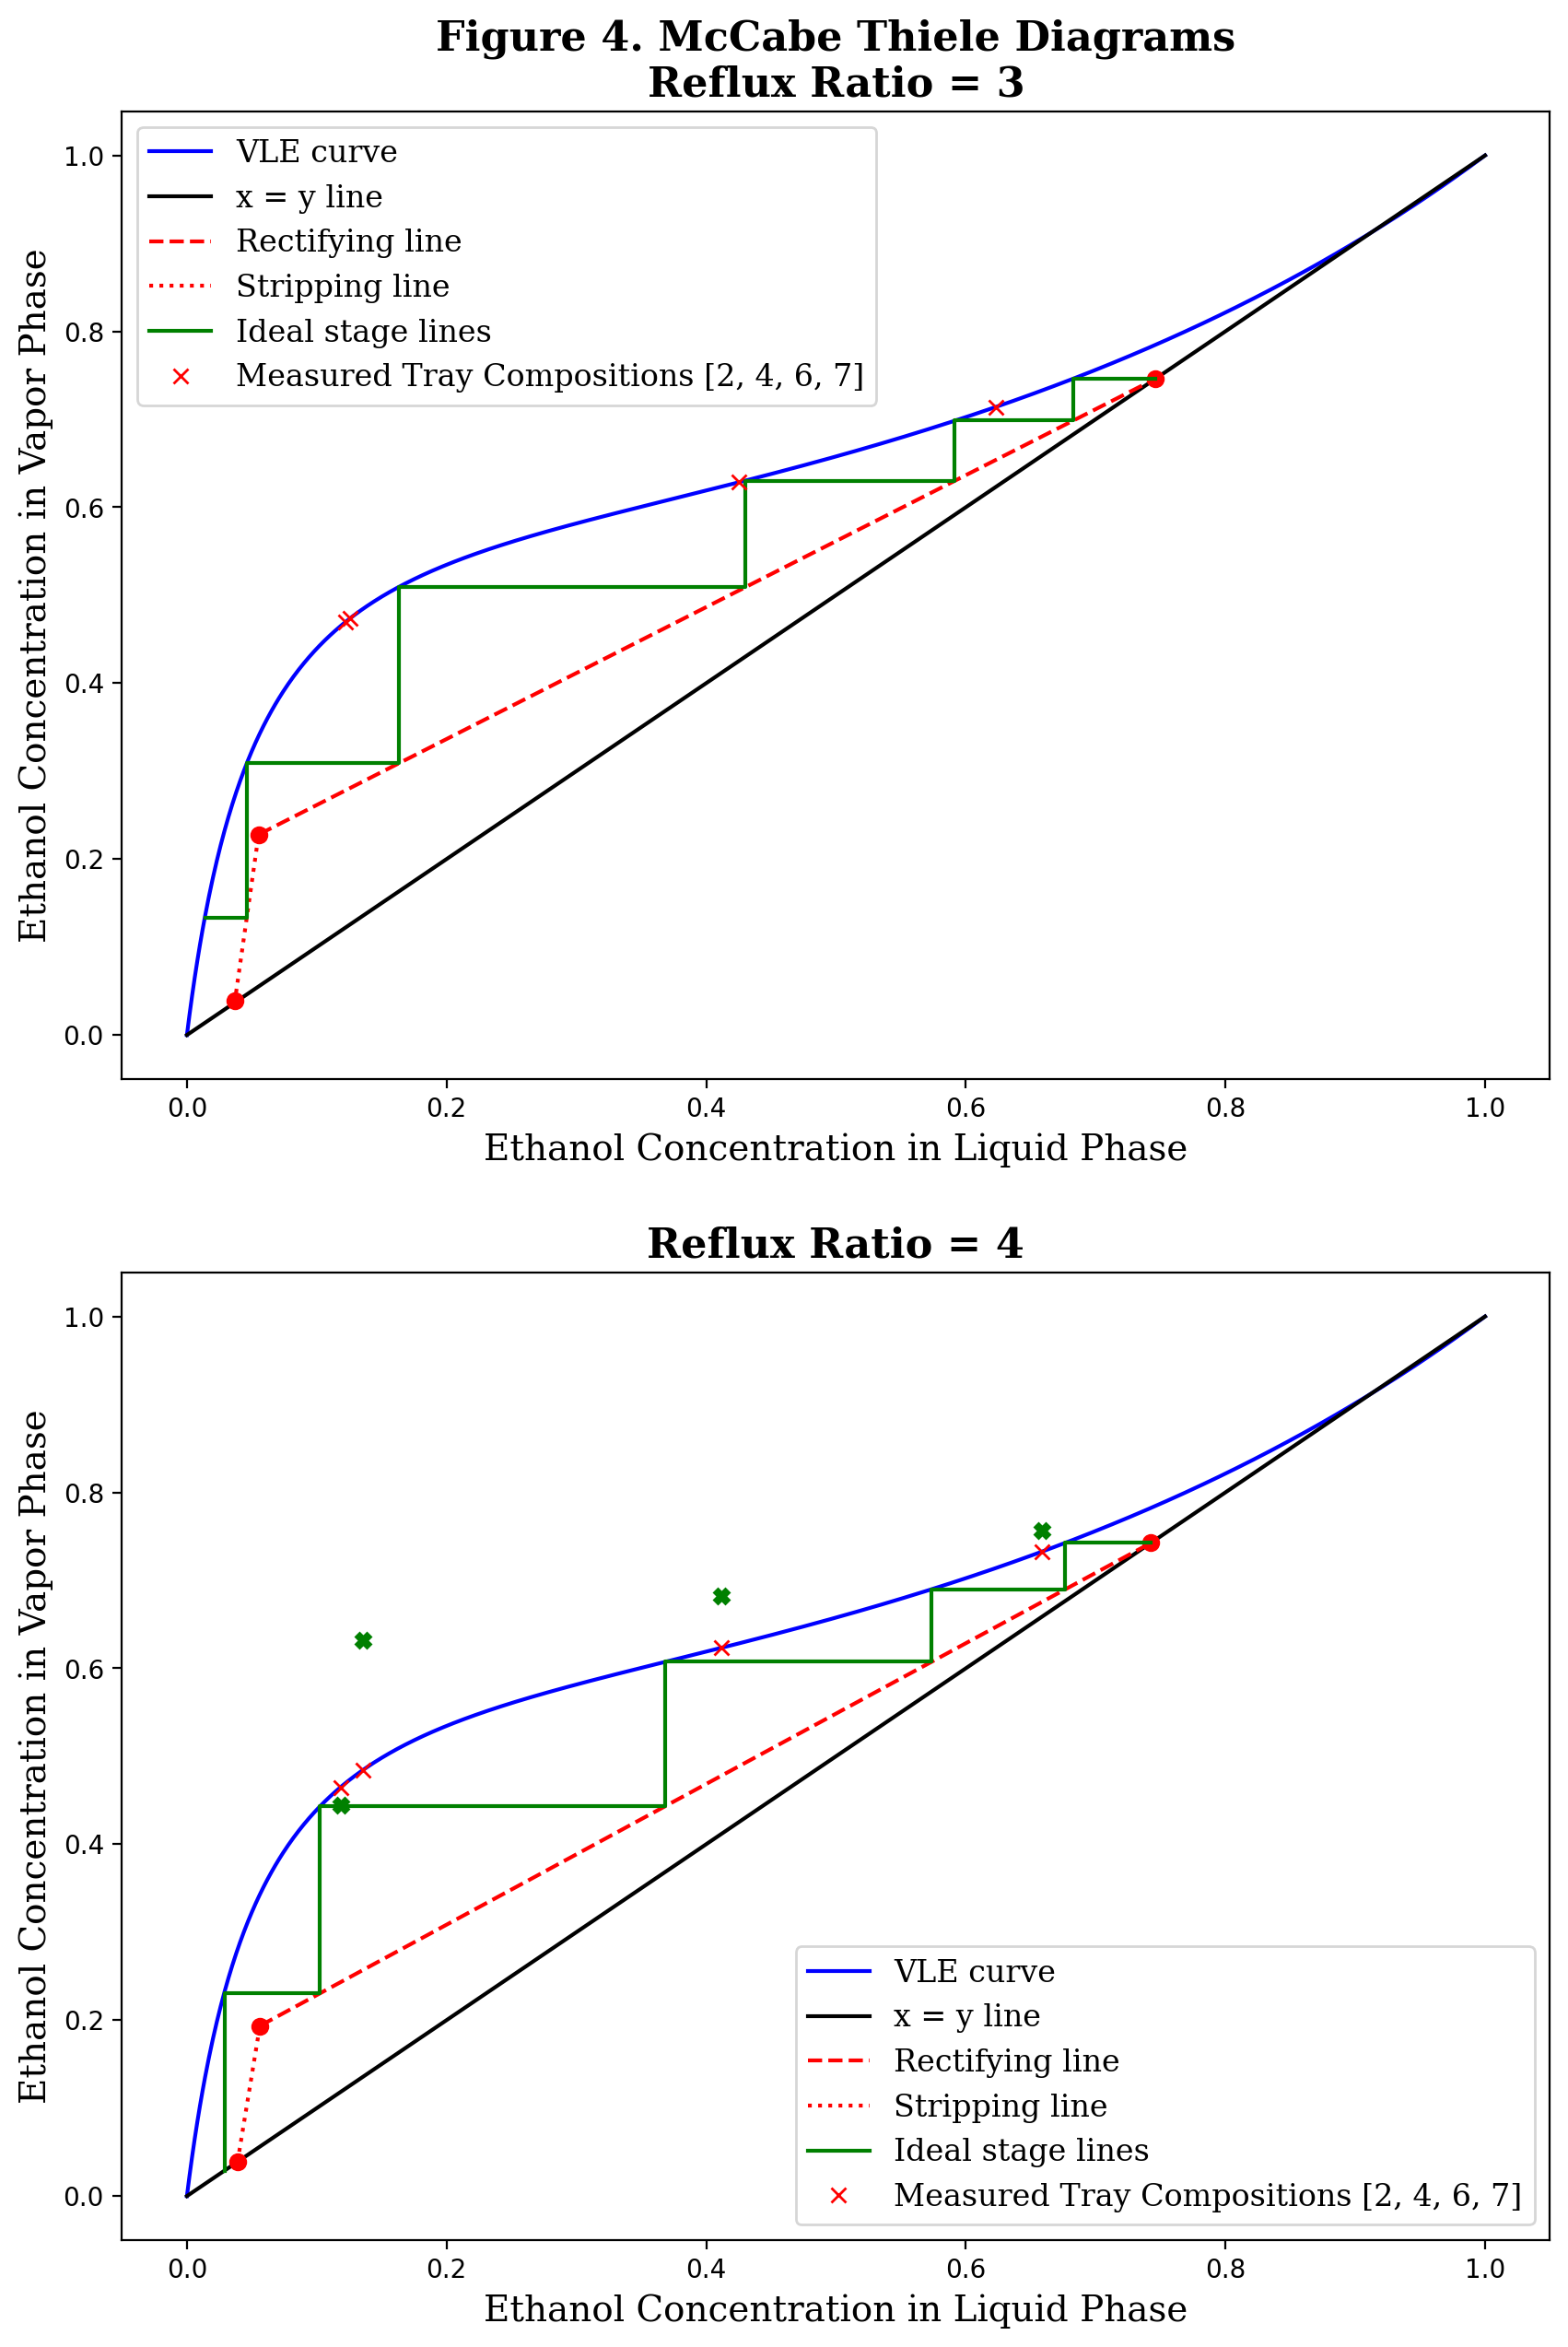

In [29]:
def operating_line(x_vals, reflux, x_prod):
    return (reflux / (reflux + 1)) * x_vals + (x_prod / (reflux + 1))


def stripping_line(x_vals, waste_x, waste_y, feed_x, feed_y):
    return ((waste_y - feed_y) / (waste_x - feed_x)) * (x_vals - feed_x) + feed_y


x_vals = np.linspace(0, 1, 1000)
guess_T = 50  # degC
# Data for pressure taken from:
# https://www.weather.gov/wrh/timeseries?site=KEDU
# Pressures taken are reported sation pressures
# reflux 4 on Feb 22, 2023 at 2:55pm
# reflux 3 on Mar 01, 2023 at 2:55pm
reflux4_P = 29.88 * 25.4  # mmHg
reflux3_P = 29.64 * 25.4  # mmHg

sol4_T = []
sol4_y = []
sol3_T = []
sol3_y = []
for x in x_vals:
    sol4 = scipy.optimize.root(vle, guess_T, args=(x, reflux4_P))
    sol4_T.append(sol4.x)
    sol4_y.append(calc_y(sol4.x, x, reflux4_P))

    sol3 = scipy.optimize.root(vle, guess_T, args=(x, reflux3_P))
    sol3_T.append(sol3.x)
    sol3_y.append(calc_y(sol3.x, x, reflux3_P))
sol4_T = np.array(sol4_T)
sol4_y = np.array(sol4_y)
sol3_T = np.array(sol3_T)
sol3_y = np.array(sol3_y)

op_x = np.linspace(collumn3.x_feed, collumn3.x_prod, 1000)
op_line3 = operating_line(op_x, collumn3.reflux, collumn3.x_prod)
op_line3_full = operating_line(x_vals, collumn3.reflux, collumn3.x_prod)
y_feed3 = operating_line(collumn3.x_feed, collumn3.reflux, collumn3.x_prod)
strip_x = np.linspace(collumn3.x_waste, collumn3.x_feed, 1000)
strip_line3 = stripping_line(
    strip_x, collumn3.x_waste, collumn3.x_waste, collumn3.x_feed, y_feed3
)
strip_line3_full = stripping_line(
    x_vals, collumn3.x_waste, collumn3.x_waste, collumn3.x_feed, y_feed3
)


plate3_y = [
    y := collumn3.x_prod,
    y,
    y := op_line3_full[yy := find_nearest(sol4_y, y)],
    y,
    y := op_line3_full[yy := find_nearest(sol4_y, op_line3_full[yy])],
    y,
    y := op_line3_full[yy := find_nearest(sol4_y, op_line3_full[yy])],
    y,
    y := op_line3_full[yy := find_nearest(sol4_y, op_line3_full[yy])],
    y,
    y := strip_line3_full[yy := find_nearest(sol4_y, op_line3_full[yy])],
    y,
]
plate3_x = [
    x := collumn3.x_prod,
    x := x_vals[xx := find_nearest(sol4_y, x)],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line3_full[xx])],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line3_full[xx])],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line3_full[xx])],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line3_full[xx])],
    x,
    x_vals[find_nearest(sol4_y, y)],
]

font = dict(family="serif", size=14)
legend = dict(family="serif", size=12)
title = dict(family="serif", size=16, weight="bold")

plt.figure(figsize=(10, 15), dpi=200)

plt.subplot(2, 1, 1)
plt.plot(x_vals, sol3_y, "b", label="VLE curve")
plt.plot(x_vals, x_vals, "k", label="x = y line")
plt.plot(collumn3.x_prod, collumn3.x_prod, "ro")
plt.plot(collumn3.x_waste, collumn4.x_waste, "ro")
plt.plot(op_x, op_line3, "r--", label="Rectifying line")
plt.plot(collumn3.x_feed, y_feed3, "ro")
plt.plot(strip_x, strip_line3, "r:", label="Stripping line")
plt.plot(plate3_x, plate3_y, "g-", label="Ideal stage lines")
plt.plot(
    collumn3.x_P2,
    sol4_y[find_nearest(x_vals, collumn3.x_P2)],
    "rx",
    label="Measured Tray Compositions [2, 4, 6, 7]",
)
plt.plot(collumn3.x_P4, sol4_y[find_nearest(x_vals, collumn3.x_P4)], "rx")
plt.plot(collumn3.x_P6, sol4_y[find_nearest(x_vals, collumn3.x_P6)], "rx")
plt.plot(collumn3.x_P7, sol4_y[find_nearest(x_vals, collumn3.x_P7)], "rx")
plt.title("Figure 4. McCabe Thiele Diagrams\nReflux Ratio = 3", **title)
plt.xlabel("Ethanol Concentration in Liquid Phase", **font)
plt.ylabel("Ethanol Concentration in Vapor Phase", **font)
plt.legend(prop=legend)


op_x = np.linspace(collumn4.x_feed, collumn4.x_prod, 1000)
op_line4 = operating_line(op_x, collumn4.reflux, collumn4.x_prod)
op_line4_full = operating_line(x_vals, collumn4.reflux, collumn4.x_prod)
y_feed4 = operating_line(collumn4.x_feed, collumn4.reflux, collumn4.x_prod)
strip_x = np.linspace(collumn4.x_waste, collumn4.x_feed, 1000)
strip_line4 = stripping_line(
    strip_x, collumn4.x_waste, collumn4.x_waste, collumn4.x_feed, y_feed4
)
strip_line4_full = stripping_line(
    x_vals, collumn4.x_waste, collumn4.x_waste, collumn4.x_feed, y_feed4
)

plate4_x = [
    x := collumn4.x_prod,
    x := x_vals[xx := find_nearest(sol4_y, x)],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line4_full[xx])],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line4_full[xx])],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line4_full[xx])],
    x,
    x := x_vals[xx := find_nearest(sol4_y, op_line4_full[xx])],
    x,
]
plate4_y = [
    y := collumn4.x_prod,
    y,
    y := op_line4_full[yy := find_nearest(sol4_y, y)],
    y,
    y := op_line4_full[yy := find_nearest(sol4_y, op_line4_full[yy])],
    y,
    y := op_line4_full[yy := find_nearest(sol4_y, op_line4_full[yy])],
    y,
    y := op_line4_full[yy := find_nearest(sol4_y, op_line4_full[yy])],
    y,
    x,
]

plate4_lconcs = [collumn4.x_P2, collumn4.x_P4, collumn4.x_P6, collumn4.x_P7]

plt.subplot(2, 1, 2)
plt.plot(x_vals, sol4_y, "b", label="VLE curve")
plt.plot(x_vals, x_vals, "k", label="x = y line")
plt.plot(collumn4.x_prod, collumn4.x_prod, "ro")
plt.plot(collumn4.x_waste, collumn4.x_waste, "ro")
plt.plot(op_x, op_line4, "r--", label="Rectifying line")
plt.plot(collumn4.x_feed, y_feed4, "ro", label="")
plt.plot(strip_x, strip_line4, "r:", label="Stripping line")
plt.plot(plate4_x, plate4_y, "g-", label="Ideal stage lines")
plt.plot(
    collumn4.x_P2,
    sol4_y[find_nearest(x_vals, collumn4.x_P2)],
    "rx",
    label="Measured Tray Compositions [2, 4, 6, 7]",
)
# plt.plot(plate4_lconcs, plate_concs4, "gX")
plt.plot(collumn4.x_P4, sol4_y[find_nearest(x_vals, collumn4.x_P4)], "rx")
plt.plot(collumn4.x_P6, sol4_y[find_nearest(x_vals, collumn4.x_P6)], "rx")
plt.plot(collumn4.x_P7, sol4_y[find_nearest(x_vals, collumn4.x_P7)], "rx")
plt.xlabel("Ethanol Concentration in Liquid Phase", **font)
plt.ylabel("Ethanol Concentration in Vapor Phase", **font)
plt.title("Reflux Ratio = 4", **title)
plt.legend(prop=legend)
# plt.tight_layout()
plt.show()
